## Exploratory Data Analysis with Spotify Data

Link for dataset: https://www.kaggle.com/datasets/leonardopena/top50spotify2019

Some questions that we will answer:

- Which songs and artists are more popular?

- Which artist has more songs on spotify?

- What can we know about the genre?

- What is the mean of minutes that a top music has?


In [2]:
# Importing Libraries

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from skimpy import clean_columns
from ydata_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline


#### Get and Inspect the Data

In [3]:
# We need to change the encoding to read the data
df = pd.read_csv("top50.csv", encoding="latin1")

In [4]:
# Seeing all the columns names
for column_headers in df.columns:
    print(column_headers)

Unnamed: 0
Track.Name
Artist.Name
Genre
Beats.Per.Minute
Energy
Danceability
Loudness..dB..
Liveness
Valence.
Length.
Acousticness..
Speechiness.
Popularity


In [5]:
# Sample the data
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


As we can see, we can drop the first column ("Unnamed") because it is just an index for the data

In [6]:
# Droping the first column
df.drop(df.columns[0], axis="columns", inplace=True)
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Now we can use the ydata-profiling to create a profiling report of the data.
This create an initial Exploratory Data Analysis.

In [7]:
# Creating profile
profile = ProfileReport(df, title="Profiling Report")

In [8]:
# Exporting to a file
profile.to_file("Spotify_Profiling_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The profiling report gives us an insight about the data, but we will investigate by ourselves too

In [9]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


As we can see, there aren't null values in our dataframe.

Also, we have 2 "object" datatypes: Artist.name and Genre

The others features are numerical, "int64" datatype

In [10]:
# Generate a descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Beats.Per.Minute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness..dB..,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence.,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length.,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness..,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness.,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


- Beats per minute: the mean are 120.06, that indicates that the overall musics are fast
- Danceability: the mean is 71.38 so, in general, the musics are very danceable
- Length: the mean length is 200.96 minutes, this indicates that in general the musics of ths dataset are long

Checking the data distribution by ploting an histogram

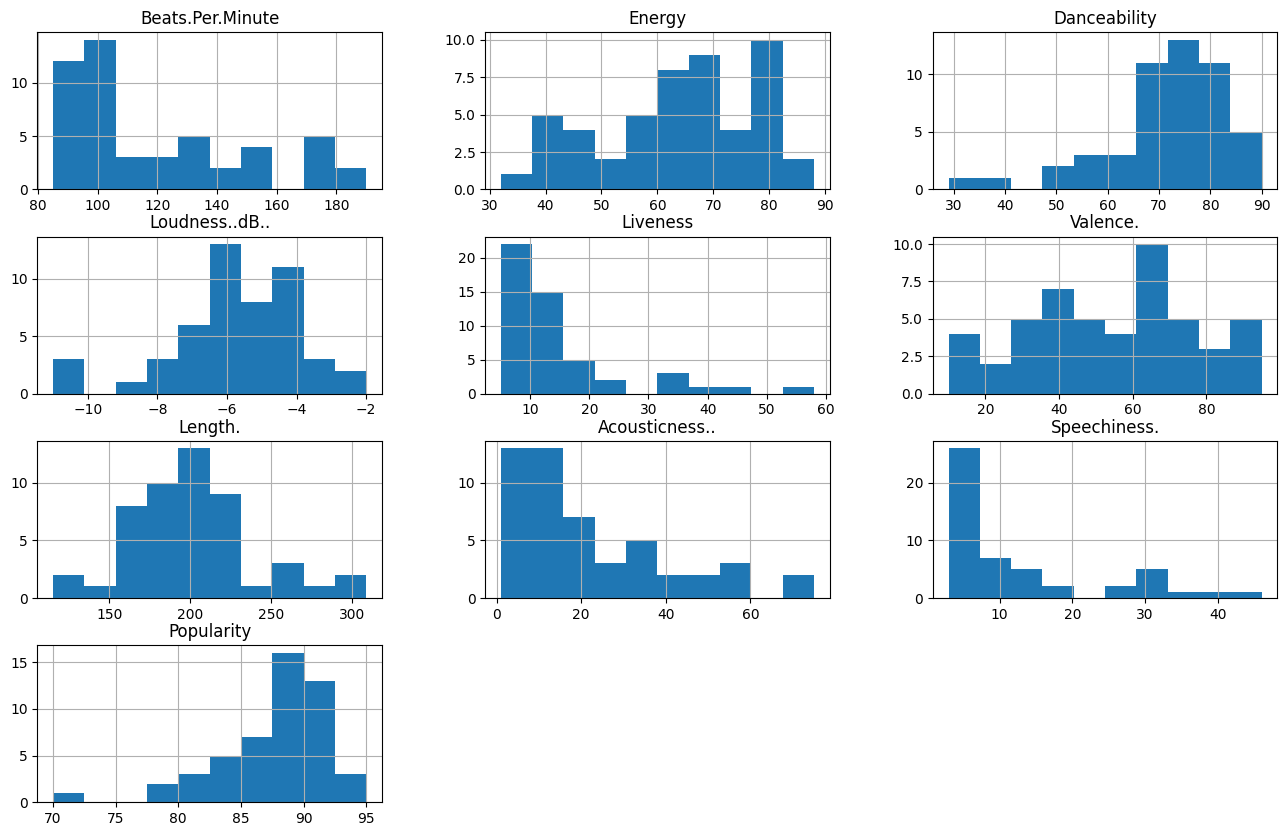

In [11]:
histo = df.hist(bins=10, figsize=(16,10))

We can see from the histogram that we don't have outliers in our dataset.

We also see that some plots are very skewed, like: "Beats.per.minute", "Danceability", "Popularity", "Liveness"

In [12]:
# Check correlation of the features by Pearson correlation
(df
 .corr()
 .style
 .background_gradient(cmap="Wistia")
)

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


We have some high correlation between "Beats.per.minute" and "Speechiness", "Energy" and "Loudness", "Energy" and "Valence"

We can try another type of correlation, the Spearman correlation

In [13]:
# Check correlation of the features by Pearson correlation
(df
 .corr("spearman")
 .style
 .background_gradient(cmap="Wistia")
)

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.012491,-0.092086,0.013771,-0.032899,-0.048304,-0.198159,-0.010390,0.391641,0.217002
Energy,0.012491,1.000000,-0.048890,0.635464,0.013355,0.466911,0.188935,-0.211494,-0.034860,-0.044186
Danceability,-0.092086,-0.048890,1.000000,0.009268,-0.261500,0.154821,-0.078659,-0.127963,0.103832,-0.140960
Loudness..dB..,0.013771,0.635464,0.009268,1.000000,0.113606,0.317048,0.164729,-0.040145,-0.063160,0.072366
Liveness,-0.032899,0.013355,-0.261500,0.113606,1.000000,-0.186640,0.201778,0.203657,-0.136935,0.012037
Valence.,-0.048304,0.466911,0.154821,0.317048,-0.186640,1.000000,-0.081093,-0.053447,-0.094742,-0.264501
Length.,-0.198159,0.188935,-0.078659,0.164729,0.201778,-0.081093,1.000000,-0.004734,0.020217,-0.121973
Acousticness..,-0.010390,-0.211494,-0.127963,-0.040145,0.203657,-0.053447,-0.004734,1.000000,0.016973,0.035626
Speechiness.,0.391641,-0.034860,0.103832,-0.063160,-0.136935,-0.094742,0.020217,0.016973,1.000000,0.165431
Popularity,0.217002,-0.044186,-0.140960,0.072366,0.012037,-0.264501,-0.121973,0.035626,0.165431,1.000000


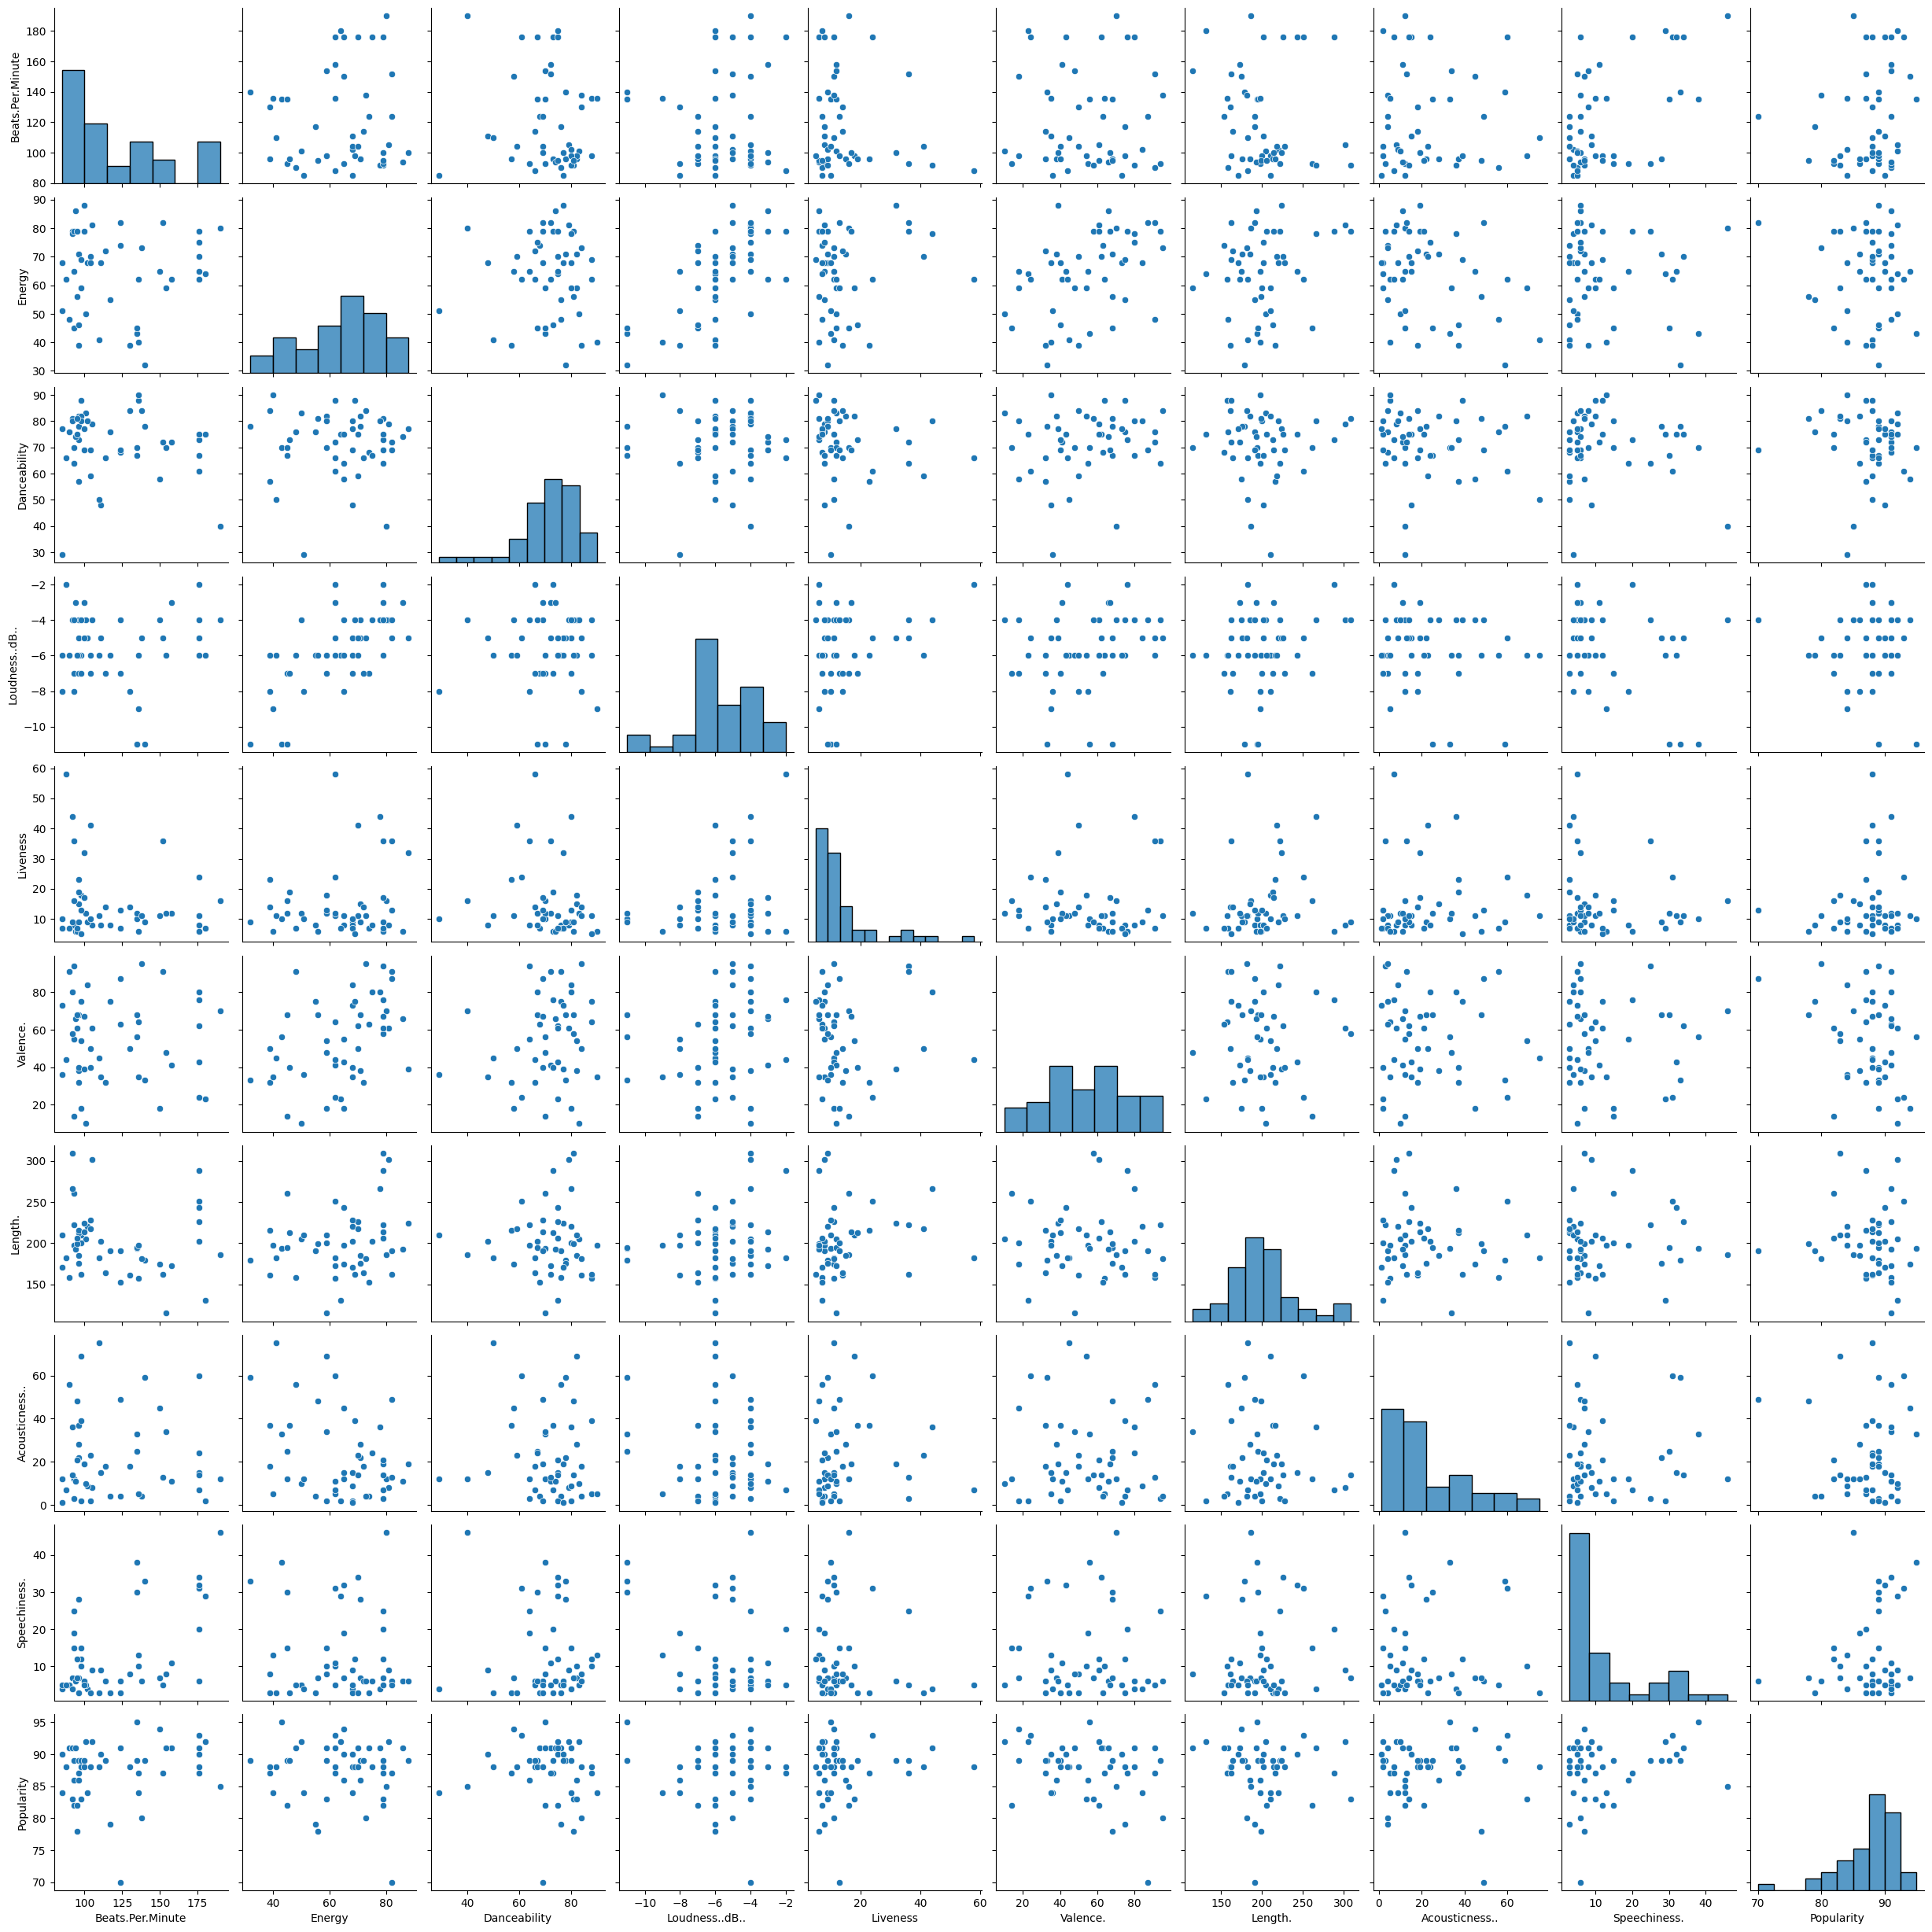

In [14]:
# Plot pirwise relationships
sns.pairplot(df)

Now we can start answer our questions:

- Which songs and artists are more popular?

The songs and artist names are in the columns "Track.name" and "Artist.name"

In [15]:
# All the artists in the dataset
df["Artist.Name"].value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist.Name, dtype: int64

As we can see "Ed Sheeran" is the artist with more musics in the dataset

In [16]:
df.nlargest(5, columns=["Popularity"])

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92


We can see that even with the greater number of musics in the dataset, Ed Sheeran's musics isn't in the top 5 popularity musics

In [17]:
df[(df["Artist.Name"] == "Ed Sheeran")].sort_values(by="Popularity",ascending=False)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


So Ed Sheeran's musics popularity it's between 82 and 87

In [18]:
# Create a dataframe to count artists in the dataset
df['Count']=1
df_artist=df.groupby('Artist.Name')['Count'].sum().reset_index().sort_values(by='Count', ascending=False)

In [30]:
fig = px.bar(
    df_artist.head(10),
    x="Artist.Name",
    y="Count",
    text_auto=True)
fig.update_layout(legend_orientation="h",
                      legend=dict(x=0, y=1, traceorder="normal"),
                      title="Top 10 Artists",
                      margin=dict(l=0, r=0, t=30, b=0)
                    )

In [20]:
# Create a dataframe to popularity analysis
df_popularity=df.filter(["Artist.Name", "Popularity"]).sort_values(by="Popularity", ascending=False)

In [21]:
df_popularity.head(10)

,Artist.Name,Popularity
9,Billie Eilish,95
4,Post Malone,94
10,Bad Bunny,93
14,Drake,92
1,Anuel AA,92
6,Lil Tecca,92
36,Sech,91
21,Lil Nas X,91
20,MEDUZA,91
19,Lizzo,91


In [31]:
fig = px.bar(
    df_popularity.head(10),
    x="Artist.Name",
    y="Popularity",
    text_auto=True)
fig.update_layout(legend_orientation="h",
                      legend=dict(x=0, y=1, traceorder="normal"),
                      title="Top 10 Artists by popularity",
                      margin=dict(l=0, r=0, t=30, b=0)
                    )

- What can we know about the genre?

In [23]:
# Listing all the Genres in the dataset
df["Genre"].head(3)

0      canadian pop
1    reggaeton flow
2         dance pop
Name: Genre, dtype: object

Observe that "Genre" is a "object" datatype

In [24]:
df_genero = df.filter(["Genre"]).head(3)
df_genero

,Genre
0,canadian pop
1,reggaeton flow
2,dance pop


In [25]:
# Create a dataframe to count genre in the dataset
df_genero['Count']=1
df_genre=df.groupby('Genre')['Count'].sum().reset_index().sort_values(by='Count', ascending=False)

In [26]:
# Top 10 genres
df_genre.head(10)

,Genre,Count
8,dance pop,8
15,pop,7
13,latin,5
10,edm,3
5,canadian hip hop,3
19,reggaeton flow,2
18,reggaeton,2
4,brostep,2
6,canadian pop,2
7,country rap,2


In [32]:
fig = px.bar(
    df_genre.head(10),
    x="Genre",
    y="Count",
    text_auto=True)
fig.update_layout(legend_orientation="h",
                      legend=dict(x=0, y=1, traceorder="normal"),
                      title="Top 10 Genres",
                      margin=dict(l=0, r=0, t=30, b=0)
                    )

- What is the mean of minutes that a top music has?

In [28]:
df.nlargest(10, columns="Popularity").mean()

Beats.Per.Minute    137.3
Energy               60.8
Danceability         71.2
Loudness..dB..       -5.6
Liveness             11.0
Valence.             43.5
Length.             185.7
Acousticness..       26.3
Speechiness.         14.6
Popularity           92.2
Count                 1.0
dtype: float64